In [25]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [2]:
os.getcwd()

'd:\\ML Program\\Final Project'

In [3]:
df = pd.read_csv('D:\\ML Program\\Final Project\\train.csv')

In [4]:
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [5]:
df.shape

(58592, 44)

In [6]:
df.columns.to_list()

['policy_id',
 'policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'area_cluster',
 'population_density',
 'make',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'displacement',
 'cylinder',
 'transmission_type',
 'gear_box',
 'steering_type',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating',
 'is_claim']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [8]:
df.dtypes.value_counts()

object     28
int64      12
float64     4
Name: count, dtype: int64

In [9]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [10]:
df.drop('policy_id',axis=1,inplace=True)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [12]:
df.nunique()

policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                                2
steering_type                     

In [13]:
df.drop('policy_tenure',axis=1,inplace=True)

In [14]:
df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [15]:
df.max_power.unique()

array(['40.36bhp@6000rpm', '88.50bhp@6000rpm', '67.06bhp@5500rpm',
       '113.45bhp@4000rpm', '88.77bhp@4000rpm', '55.92bhp@5300rpm',
       '97.89bhp@3600rpm', '61.68bhp@6000rpm', '118.36bhp@5500rpm'],
      dtype=object)

In [16]:
df.sort_values('displacement',ascending=False).head(15)

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
45288,0.09,0.317308,C2,27003,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
47325,0.08,0.432692,C15,290,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
31409,0.17,0.461538,C10,73430,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
31410,0.12,0.326923,C2,27003,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
42422,0.18,0.500000,C2,27003,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
19774,0.15,0.548077,C5,34738,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
49885,0.10,0.480769,C2,27003,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
52116,0.09,0.355769,C6,13051,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
39247,0.07,0.317308,C10,73430,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
55623,0.05,0.307692,C2,27003,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0


In [17]:
df.segment.unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [18]:
df.groupby('segment')['displacement'].describe().T

segment,A,B1,B2,C1,C2,Utility
count,17321.000000,4173.0,18314.000000,3557.000000,14018.0,1209.0
mean,823.811270,998.0,1223.176695,1376.094743,1493.0,1196.0
std,69.803312,0.0,84.665109,147.572646,0.0,0.0
min,796.000000,998.0,1197.000000,1197.000000,1493.0,1196.0
25%,796.000000,998.0,1197.000000,1197.000000,1493.0,1196.0
50%,796.000000,998.0,1197.000000,1498.000000,1493.0,1196.0
75%,796.000000,998.0,1197.000000,1498.000000,1493.0,1196.0
max,999.000000,998.0,1497.000000,1498.000000,1493.0,1196.0


In [19]:
df.groupby('segment')['is_claim'].describe().T

segment,A,B1,B2,C1,C2,Utility
count,17321.000000,4173.000000,18314.000000,3557.000000,14018.000000,1209.000000
mean,0.060389,0.058471,0.068581,0.064099,0.064275,0.060380
std,0.238213,0.234660,0.252748,0.244964,0.245250,0.238289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df.select_dtypes('int').describe()

,population_density,make,airbags,displacement,cylinder,gear_box,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [21]:
for i in df.select_dtypes('object'):
    print(df[i].value_counts())
    print('*'*30)

area_cluster
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: count, dtype: int64
******************************
segment
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: count, dtype: int64
******************************
model
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: count, dtype: int64
******************************
fuel_type
Petrol    20532
CNG       20330
Diesel    17730
Name: count, dtype: int64
******************************
max_torque
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
2

In [29]:
# Set seaborn style
sns.set_theme(style='whitegrid')

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_30800\1505753341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_claim', data=df, hue =None,palette='crest')


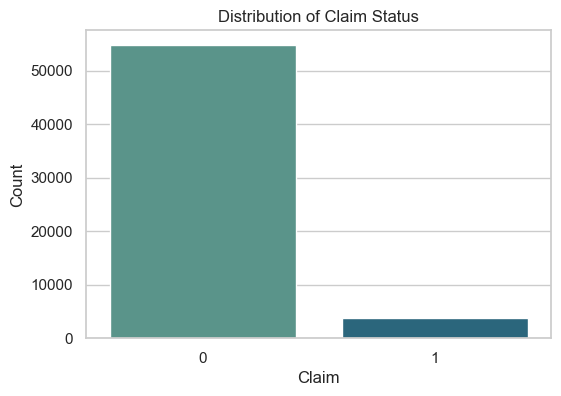

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_claim', data=df, hue =None,palette='crest')
plt.title('Distribution of Claim Status')
plt.xlabel('Claim')
plt.ylabel('Count')
plt.show()

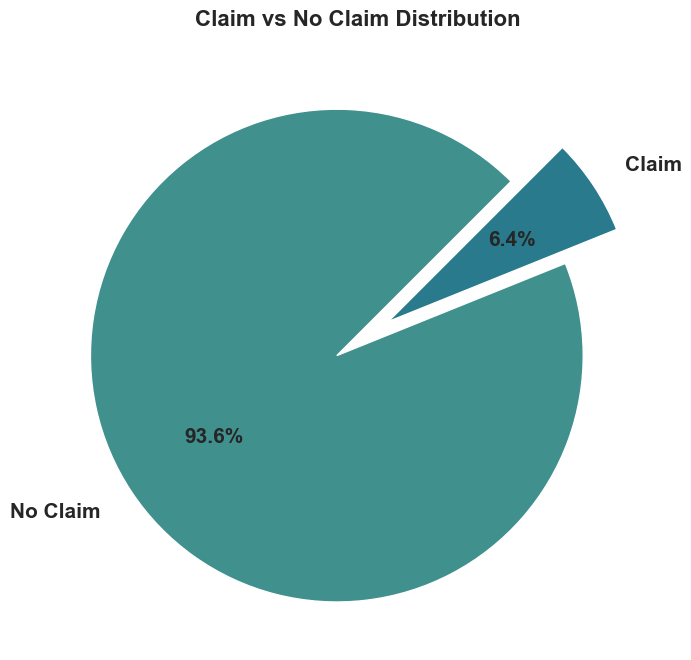

In [34]:
colors = sns.color_palette("crest")[2:4]

fig = plt.figure(facecolor = 'white', figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, facecolor = 'white')

plt.pie(df['is_claim'].value_counts(),
        labels=['No Claim', 'Claim'],
        radius=1,
        colors=colors,  # use the palette defined above
        autopct='%1.1f%%',
        explode=[0.1, 0.15],
        labeldistance=1.15,
        startangle=45,
        textprops={'fontsize': 15, 'fontweight': 'bold'}
       )

fig.patch.set_facecolor('white')
plt.title('Claim vs No Claim Distribution', fontsize=16, fontweight='bold')
plt.show()

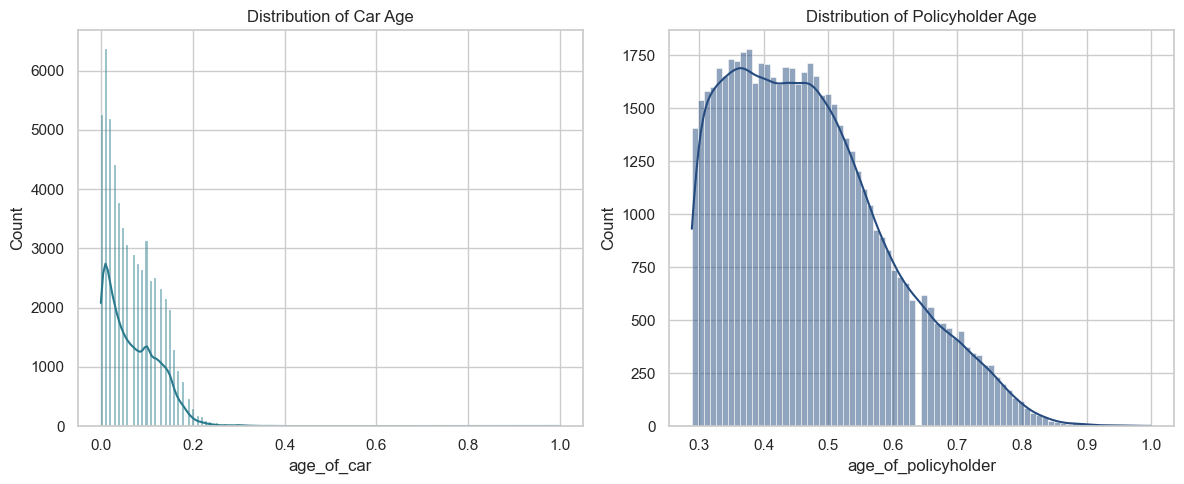

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['age_of_car'], kde=True, ax=axes[0], color=sns.color_palette("crest")[3])
axes[0].set_title('Distribution of Car Age')

sns.histplot(df['age_of_policyholder'], kde=True, ax=axes[1], color=sns.color_palette("crest")[5])
axes[1].set_title('Distribution of Policyholder Age')

plt.tight_layout()
plt.show()

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_30800\3856634113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fuel_type', y='is_claim', data=fuel_claim_rate, palette='viridis')


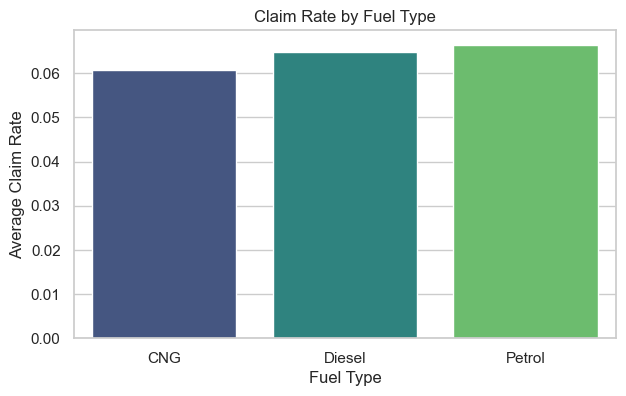

In [35]:
# Claim rate by Fuel Type

fuel_claim_rate = df.groupby('fuel_type')['is_claim'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(x='fuel_type', y='is_claim', data=fuel_claim_rate, palette='viridis')
plt.title('Claim Rate by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Claim Rate')
plt.show()

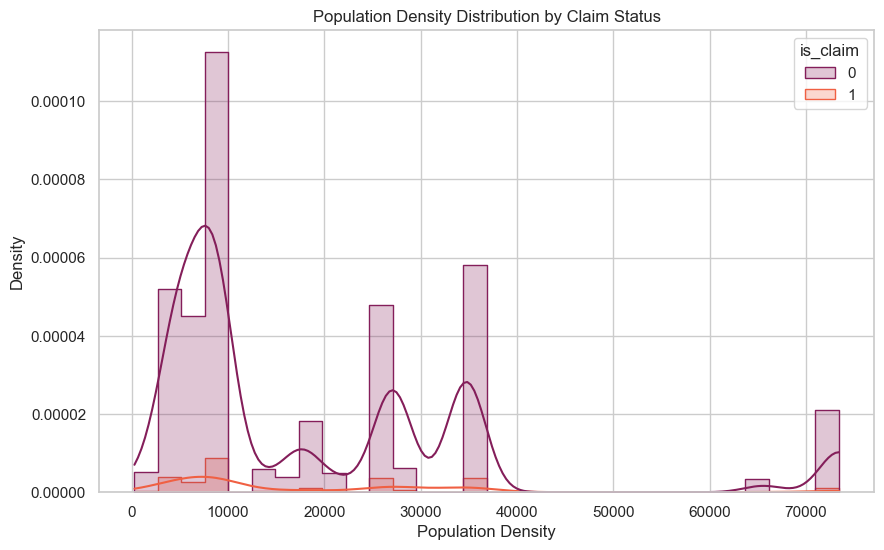

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='population_density', hue='is_claim', bins=30, 
             kde=True, element="step", stat='density', palette='rocket')
plt.title('Population Density Distribution by Claim Status')
plt.xlabel('Population Density')
plt.ylabel('Density')
plt.show()

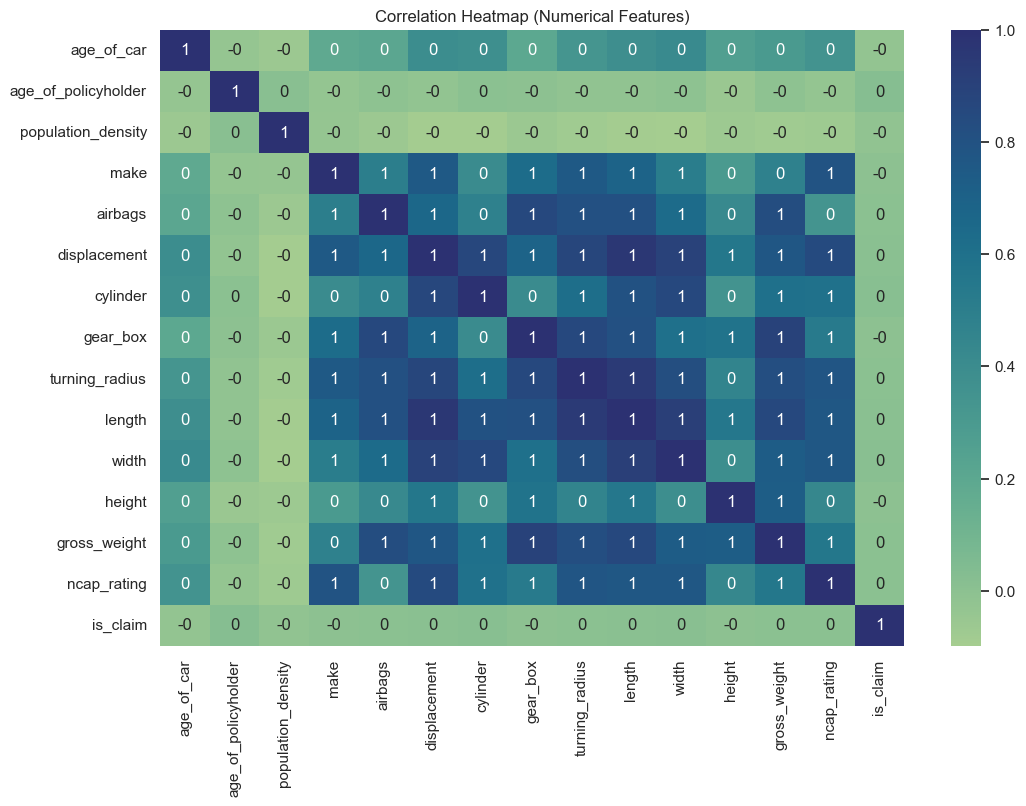

In [40]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt='.0f',
    cmap='crest'
)

plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_30800\3433425224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment', y='is_claim', data=seg_claim_rate, palette='viridis')


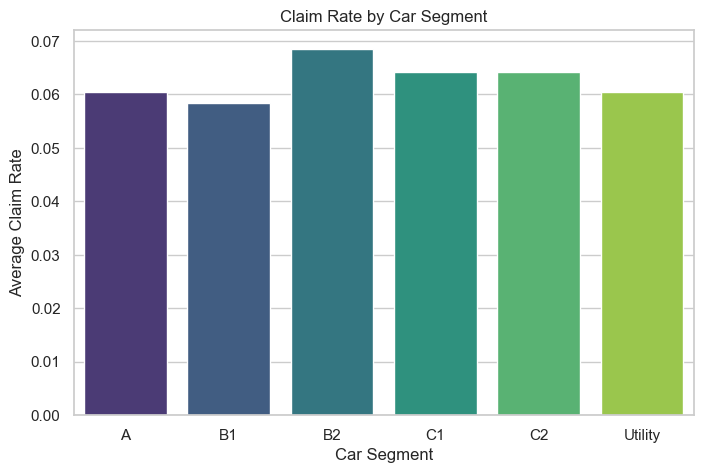

In [38]:
seg_claim_rate = df.groupby('segment')['is_claim'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='segment', y='is_claim', data=seg_claim_rate, palette='viridis')
plt.title('Claim Rate by Car Segment')
plt.xlabel('Car Segment')
plt.ylabel('Average Claim Rate')
plt.show()

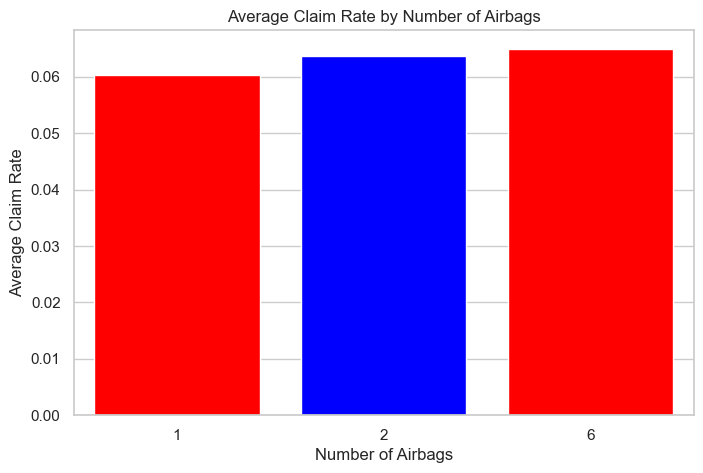

In [43]:
airbag_claim_rate = df.groupby('airbags')['is_claim'].mean().reset_index()
plt.figure(figsize=(8,5))
ax = sns.barplot(x='airbags', y='is_claim', data=airbag_claim_rate)
# apply explicit colors (red, blue) to avoid passing `palette` without `hue`
colors = ['red', 'blue']
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i % len(colors)])
plt.title('Average Claim Rate by Number of Airbags')
plt.xlabel('Number of Airbags')
plt.ylabel('Average Claim Rate')
plt.show()

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_30800\2208446675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='is_claim', data=make_claim_rate, palette='rocket')


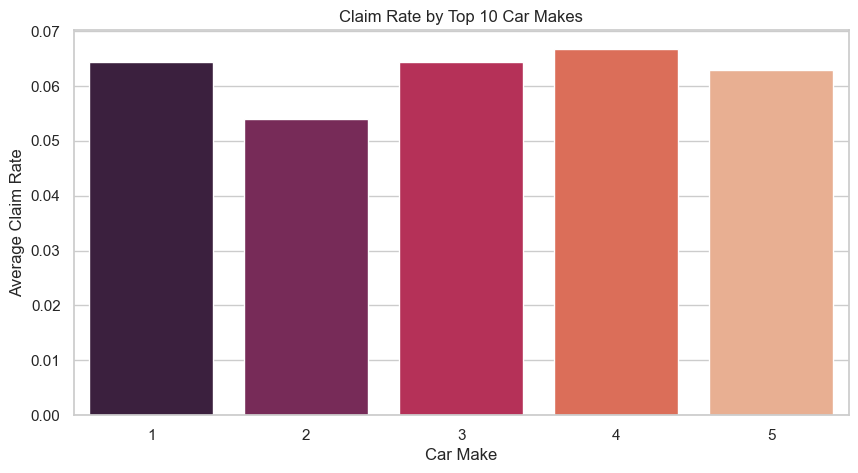

In [42]:
top_makes = df['make'].value_counts().nlargest(10).index
make_claim_rate = df[df['make'].isin(top_makes)].groupby('make')['is_claim'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='make', y='is_claim', data=make_claim_rate, palette='rocket')
plt.title('Claim Rate by Top 10 Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Average Claim Rate')
plt.show()

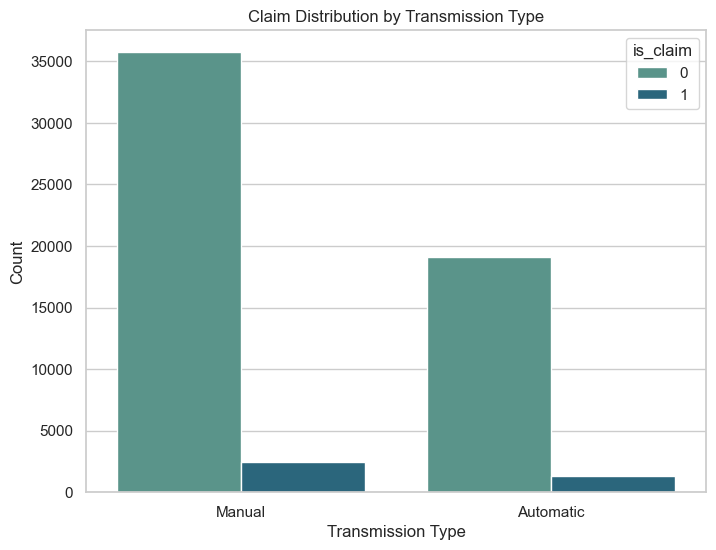

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x='transmission_type', hue='is_claim', data=df, palette='crest')
plt.title('Claim Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_30800\2046543291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transmission_type', y='is_claim', data=trans_claim_rate, palette='rocket')


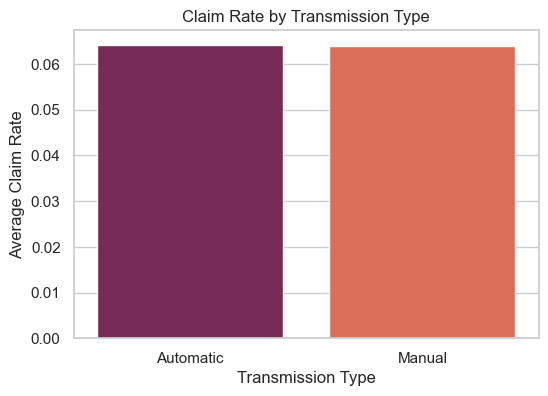

In [45]:
trans_claim_rate = df.groupby('transmission_type')['is_claim'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='transmission_type', y='is_claim', data=trans_claim_rate, palette='rocket')
plt.title('Claim Rate by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Claim Rate')
plt.show()